In [6]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

#External source used
# Seaborn official site https://seaborn.pydata.org
# Pandas DataFrame Official site https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
# Kaggle's 120 years of Olympic History site https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [2]:
#read the csv file into a Pandas data frame
df_olympics = pd.read_csv('athlete_events.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
#Print the details of the df_olympics data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_olympics data frame are: \n", df_olympics.info()) 


# Find the number of rows and columns in the df_olympics data frame.
num_rows = df_olympics.shape[0]
num_cols = df_olympics.shape[1]
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

#Print the descriptive detail (min, max, quartiles etc) for 'Age' column of  the df_olympics
print ("\n\n>>Task 1-c: Descriptive details of age column are\n",df_olympics['Age'].describe())


#Print the number of years from the first game until the last in our data-set, and the number of  unique values for 'games'.
num_tot_years  = df_olympics['Year'].nunique()
num_uniq_games = df_olympics['Games'].nunique()
print ("\n\n >>Task 1-d: In our dataset we have historical data for %s years, and for %s games. " % (num_tot_years, num_uniq_games))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
>>Task 1-a: Details of df_olympics data frame are: 
 None


>>Task 1-b: Number of rows:271116 and number of columns:15


>>Task 1-c: Descriptive details of age column are
 count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.0000

In [4]:
# Find out the total number of female and male athletes that participated on the 2004 Olympics Games
num_female_2004 = df_olympics[(df_olympics['Year'] == 2014) & (df_olympics['Sex'] == 'F')]['Sex'].count()
num_male_2004   = df_olympics[(df_olympics['Year'] == 2014) & (df_olympics['Sex'] == 'M')]['Sex'].count()
print (">>Task 2-a: At the Olympics of 2004, there were participating %s female and %s male athletes" 
       % (num_female_2004, num_male_2004))


#Find out the total number of awarded metals for the year 1896, and the year 2016.
#Utilize the property of cell's missing values
num_medals_1986 = df_olympics[(df_olympics['Year'] == 1896)]['Medal'].count()
num_medals_2016 = df_olympics[(df_olympics['Year'] == 2016)]['Medal'].count()

print ("\n\n>>Task 2-b: The total number of metals awarded in 1896 was %s, while in 2016 was %s" 
       % (num_medals_1986, num_medals_2016))


# Find out the top 10 athletes with the most gold medals for all years.
top10_gold_athletes=df_olympics.loc[df_olympics['Medal']=='Gold']['Name'].value_counts().head(10)
print ("\n\n>>Task 2-c: The top 10 athletes for all years are: \n%s" % (top10_gold_athletes))


>>Task 2-a: At the Olympics of 2004, there were participating 2023 female and 2868 male athletes


>>Task 2-b: The total number of metals awarded in 1896 was 143, while in 2016 was 2023


>>Task 2-c: The top 10 athletes for all years are: 
Michael Fred Phelps, II               23
Raymond Clarence "Ray" Ewry           10
Paavo Johannes Nurmi                   9
Frederick Carlton "Carl" Lewis         9
Mark Andrew Spitz                      9
Larysa Semenivna Latynina (Diriy-)     9
Ole Einar Bjrndalen                    8
Usain St. Leo Bolt                     8
Birgit Fischer-Schmidt                 8
Matthew Nicholas "Matt" Biondi         8
Name: Name, dtype: int64


Text(0.5, 1.0, 'Top-10 tallest althlets for all years')

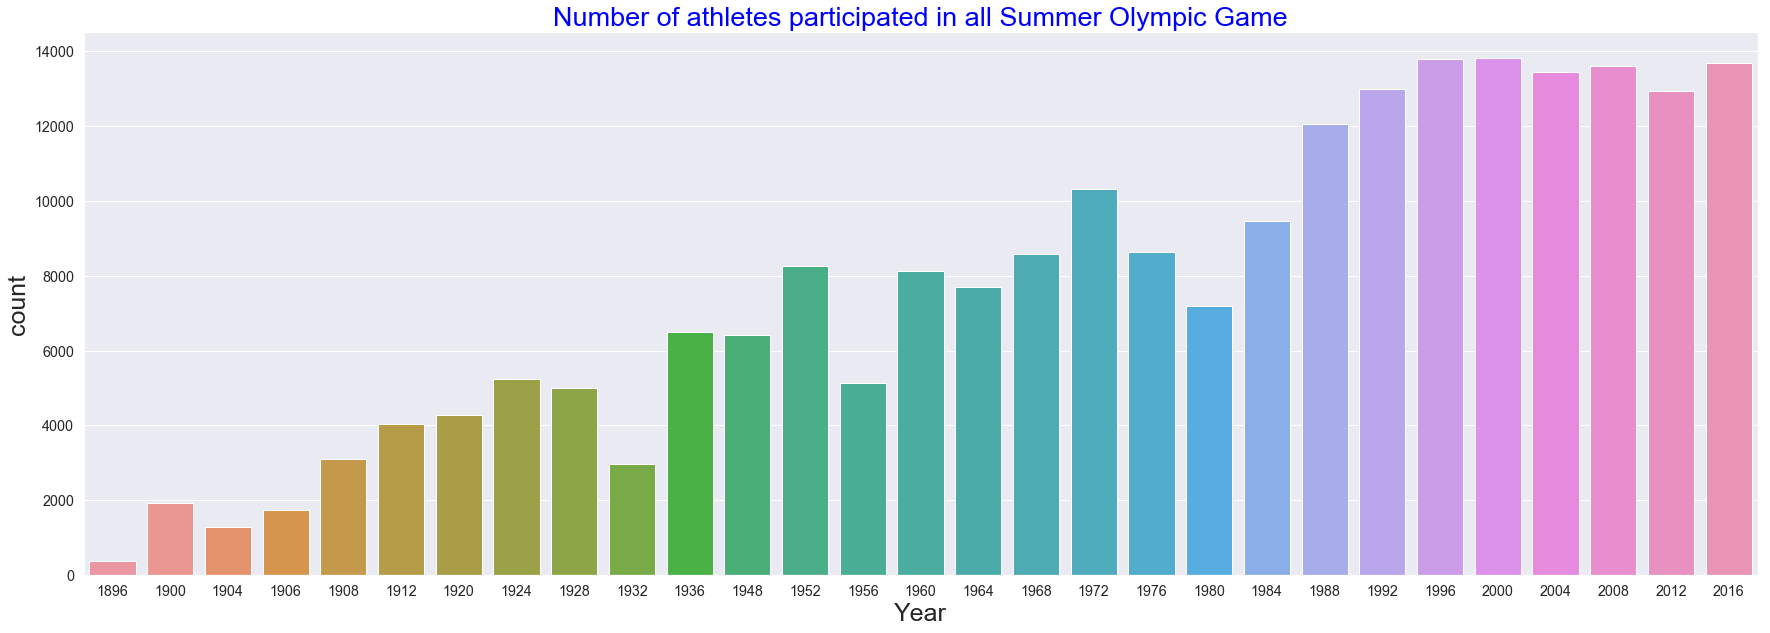

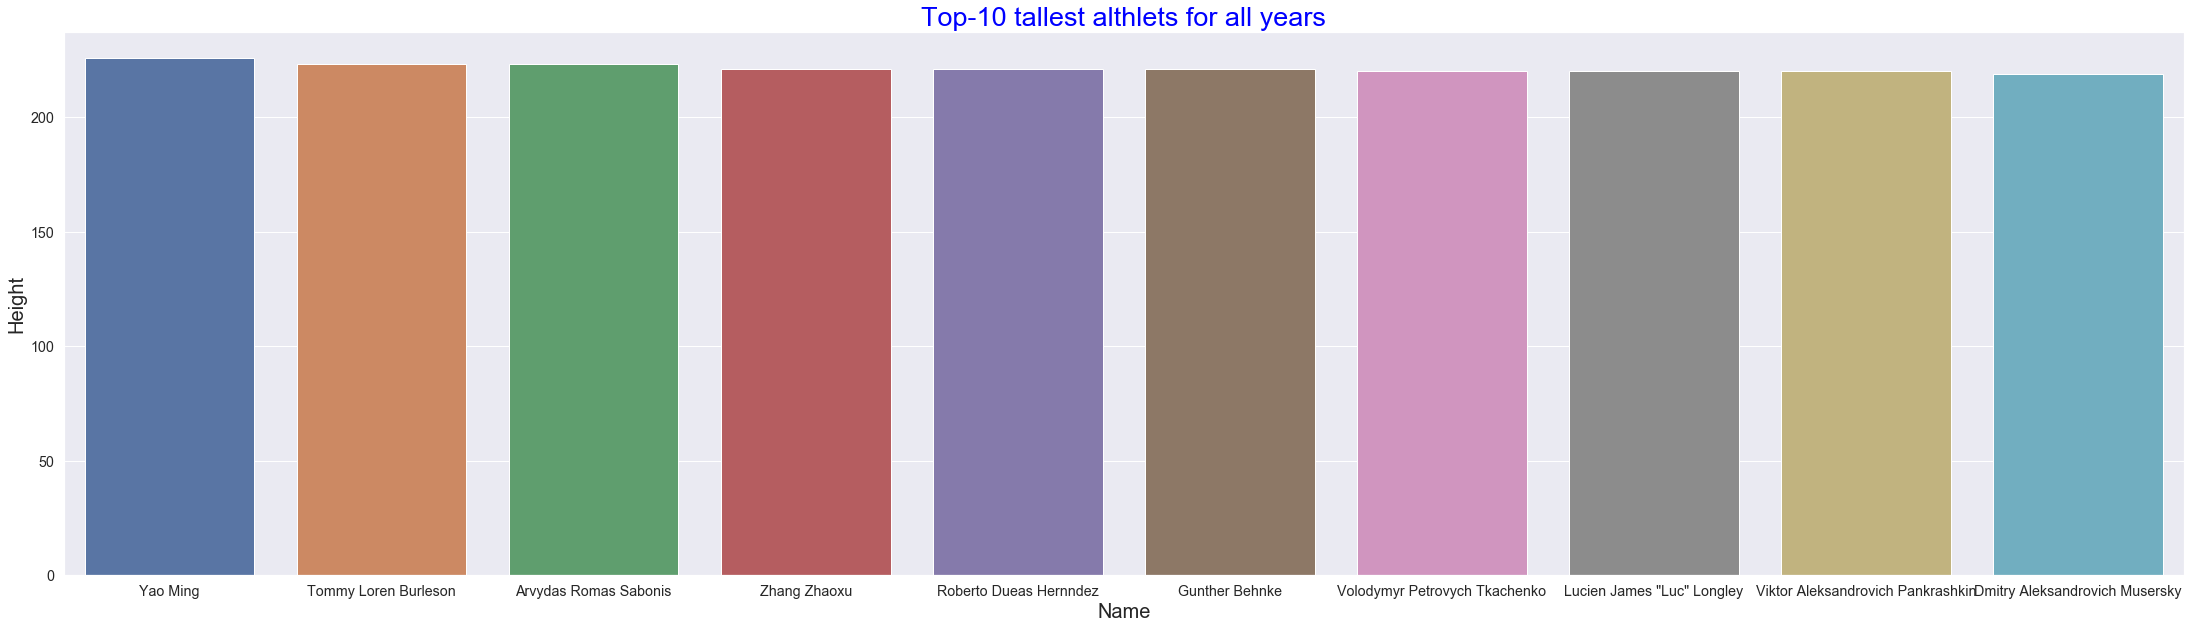

In [5]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)


# Drawing a histogram for total number of athletes participated in all Summer Olympic Games. 

plt.rcParams["axes.labelsize"] = 25
all_medals_in_olympic = df_olympics[df_olympics['Season'] == 'Summer']
plt.figure(figsize=(30,10))
sns.countplot(x='Year',data=all_medals_in_olympic);
plt.title('Number of athletes participated in all Summer Olympic Game', color = 'blue', size=27)





# Drawing a "vertical" bar chart that lists the top-10 talest althlets for all years.


plt.figure(figsize=(38,10))
sorted_height = df_olympics.sort_values(by='Height',ascending = False)
finaldata= sorted_height.drop_duplicates(subset='Name',keep='first').head(10)[['Name','Height']]
ax= sns.barplot(x='Name',y='Height',data=finaldata)
ax.set_xlabel('Name',fontsize=20)
ax.set_ylabel('Height',fontsize=20)
plt.setp(ax.get_label(), fontsize=22)
plt.title('Top-10 tallest althlets for all years', color = 'blue', size=27)